In [20]:
# %pip install plotly

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:

# Generate synthetic data
np.random.seed(42) # Set a seed for reproducibility (same random numbers every time)
X = 2 * np.random.rand(100, 1) # Create an array of 100 random numbers between 0 and 2
y = 4 + 3 * X + np.random.randn(100, 1) # Create an array of 100 random numbers between 0 and 1


In [23]:

# Add intercept term to X
X_b = np.c_[np.ones((X.shape[0], 1)), X] # Add a column of ones to the beginning of X


In [24]:

# Calculate coefficients using the normal equation
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)


In [25]:

# Print the coefficients
print(f"Intercept: {theta[0][0]:.2f}")
print(f"Slope: {theta[1][0]:.2f}")


Intercept: 4.22
Slope: 2.77


In [26]:

# Make predictions
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta)


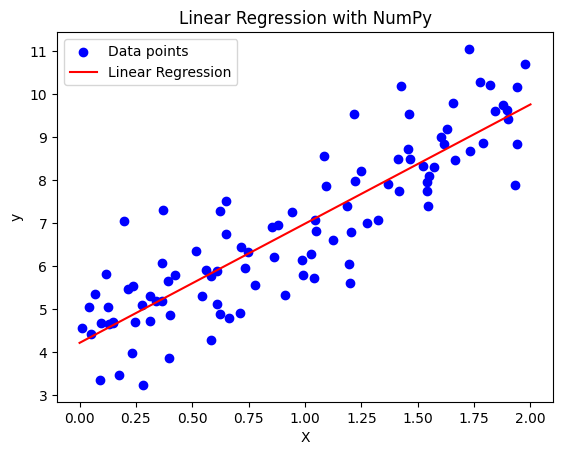

In [27]:

# Plot the results
plt.scatter(X, y, color='b', label='Data points')
plt.plot(X_new, y_predict, 'r-', label='Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression with NumPy')
plt.show()


In [28]:
# Calculate R-squared
y_pred = X_b.dot(theta)
ss_total = np.sum((y - np.mean(y))**2)
ss_residual = np.sum((y - y_pred)**2)
r_squared = 1 - (ss_residual / ss_total)
print(f"R-squared: {r_squared:.4f}")


R-squared: 0.7693


In [29]:
# %pip install scikit-learn

In [30]:
# Linear Regression using scikit-learn

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


In [31]:

# Prepare the data
X = X.reshape(-1, 1)  # Reshape X to a 2D array


In [32]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [34]:

# Print the coefficients
print(f"Intercept (sklearn): {float(model.intercept_):.2f}")
print(f"Slope (sklearn): {float(model.coef_[0]):.2f}")


Intercept (sklearn): 4.14
Slope (sklearn): 2.80


/var/folders/mn/5fylbrm10lgccyd8xqnr0cgm0000gn/T/ipykernel_32958/95555357.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Intercept (sklearn): {float(model.intercept_):.2f}")
/var/folders/mn/5fylbrm10lgccyd8xqnr0cgm0000gn/T/ipykernel_32958/95555357.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Slope (sklearn): {float(model.coef_[0]):.2f}")


In [35]:

# Make predictions
X_new = np.array([[0], [2]])
y_predict_sklearn = model.predict(X_new)


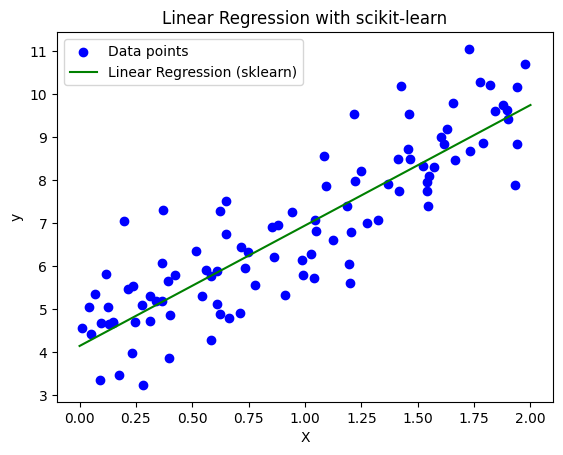

In [36]:

# Plot the results
plt.scatter(X, y, color='b', label='Data points')
plt.plot(X_new, y_predict_sklearn, 'g-', label='Linear Regression (sklearn)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression with scikit-learn')
plt.show()


In [37]:

# Calculate R-squared
y_pred_sklearn = model.predict(X_test)
r_squared_sklearn = r2_score(y_test, y_pred_sklearn)
print(f"R-squared (sklearn): {r_squared_sklearn:.4f}")


R-squared (sklearn): 0.8072
